___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# KNN Project Exercise 

Due to the simplicity of KNN for Classification, let's focus on using a PipeLine and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [164]:
df = pd.read_csv('sonar.all-data.csv')

In [165]:
df.head()

,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,Freq10,...,Freq52,Freq53,Freq54,Freq55,Freq56,Freq57,Freq58,Freq59,Freq60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [166]:
df.head(5)

,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,Freq10,...,Freq52,Freq53,Freq54,Freq55,Freq56,Freq57,Freq58,Freq59,Freq60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Data Exploration

**TASK: Create a heatmap of the correlation between the difference frequency responses.**

In [132]:
df.shape

(208, 61)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Freq1   208 non-null    float64
 1   Freq2   208 non-null    float64
 2   Freq3   208 non-null    float64
 3   Freq4   208 non-null    float64
 4   Freq5   208 non-null    float64
 5   Freq6   208 non-null    float64
 6   Freq7   208 non-null    float64
 7   Freq8   208 non-null    float64
 8   Freq9   208 non-null    float64
 9   Freq10  208 non-null    float64
 10  Freq11  208 non-null    float64
 11  Freq12  208 non-null    float64
 12  Freq13  208 non-null    float64
 13  Freq14  208 non-null    float64
 14  Freq15  208 non-null    float64
 15  Freq16  208 non-null    float64
 16  Freq17  208 non-null    float64
 17  Freq18  208 non-null    float64
 18  Freq19  208 non-null    float64
 19  Freq20  208 non-null    float64
 20  Freq21  208 non-null    float64
 21  Freq22  208 non-null    float64
 22  Fr

In [122]:
# CODE HERE
df.dtypes

Freq1     float64
Freq2     float64
Freq3     float64
Freq4     float64
Freq5     float64
           ...   
Freq57    float64
Freq58    float64
Freq59    float64
Freq60    float64
Label      object
Length: 61, dtype: object

In [135]:
df.describe()

,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,Freq10,...,Freq51,Freq52,Freq53,Freq54,Freq55,Freq56,Freq57,Freq58,Freq59,Freq60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [167]:
df['Label'].unique()

array(['R', 'M'], dtype=object)

In [168]:
df.replace('R', 0, inplace=True)
df.replace('M',1,inplace=True)
#df=df.astype(int)
df

,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,Freq10,...,Freq52,Freq53,Freq54,Freq55,Freq56,Freq57,Freq58,Freq59,Freq60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [144]:
count1 = (df['Label'] == 0).sum()
print('Count of Rocks in Column  Label : ', count1)

Count of Rocks in Column  Label :  97


In [145]:
count2 = (df['Label'] == 1).sum()
print('Count of Mines in Column  Label : ', count2)

Count of Mines in Column  Label :  111


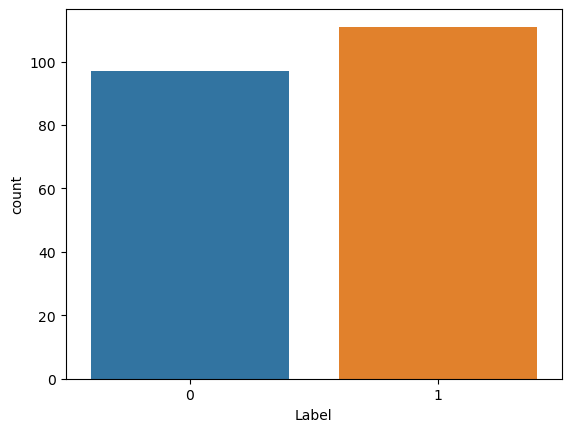

In [146]:
sns.countplot(x ='Label', data = df)
plt.show()

In [147]:
df.dtypes

Freq1     float64
Freq2     float64
Freq3     float64
Freq4     float64
Freq5     float64
           ...   
Freq57    float64
Freq58    float64
Freq59    float64
Freq60    float64
Label       int64
Length: 61, dtype: object

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [169]:
#CODE HERE
correlation_matrix=df.corr()
correlation_matrix

,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,Freq10,...,Freq52,Freq53,Freq54,Freq55,Freq56,Freq57,Freq58,Freq59,Freq60,Label
Freq1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,0.271694
Freq2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,0.231238
Freq3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,0.192195
Freq4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,0.250638
Freq5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Freq57,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,0.140327,...,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,0.000933
Freq58,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,0.184191
Freq59,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,0.130826
Freq60,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.195379,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,0.090055


<Axes: >

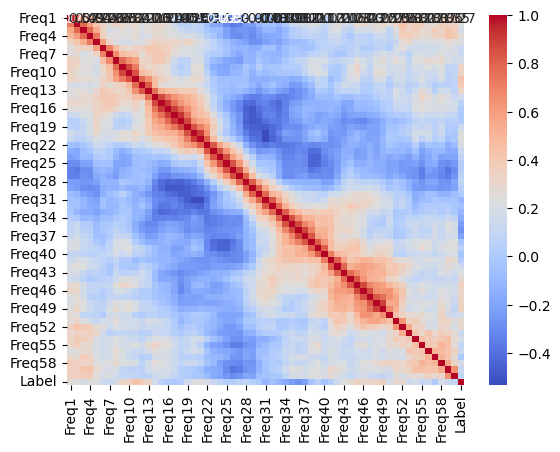

In [170]:
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=True)

In [171]:
#top 5 correlated frequencies with the target\label
correlation_matrix['Label']

Freq1     0.271694
Freq2     0.231238
Freq3     0.192195
Freq4     0.250638
Freq5     0.222232
            ...   
Freq57    0.000933
Freq58    0.184191
Freq59    0.130826
Freq60    0.090055
Label     1.000000
Name: Label, Length: 61, dtype: float64

In [172]:
correlation_matrix.sort_values(by=['Label'])

,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,Freq10,...,Freq52,Freq53,Freq54,Freq55,Freq56,Freq57,Freq58,Freq59,Freq60,Label
Freq36,0.080722,0.132611,0.053070,0.039282,-0.073481,-0.023621,0.002979,0.087187,0.036120,-0.004460,...,0.023165,0.072182,0.136711,0.074314,0.069959,0.189471,0.106275,0.222683,0.176982,-0.269151
Freq35,0.098118,0.115824,0.017053,0.015200,-0.086529,-0.028815,-0.015531,0.035733,0.015065,-0.035765,...,0.052650,0.122798,0.138357,0.110776,0.131490,0.168361,0.143897,0.227783,0.191193,-0.227670
Freq37,0.119565,0.169186,0.107530,0.063486,-0.064617,-0.064798,-0.001376,0.110739,0.111769,0.085072,...,0.002078,0.079799,0.130427,0.086914,0.116549,0.180789,0.110760,0.163162,0.166263,-0.209055
Freq34,0.031319,-0.004247,-0.099409,-0.083965,-0.140559,-0.070337,-0.077662,-0.014578,0.013594,-0.021291,...,0.008364,0.095110,0.064450,0.089024,0.109288,0.106959,0.083192,0.138214,0.075686,-0.172010
Freq31,-0.048370,-0.055862,-0.106198,-0.190086,-0.214336,-0.054136,-0.096945,-0.081072,-0.041649,-0.091193,...,0.087360,0.026300,-0.146485,-0.080546,-0.067373,-0.018733,-0.036092,-0.044197,-0.043015,-0.110728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Freq10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358,0.341142
Freq49,0.247560,0.313995,0.223074,0.133294,0.088128,0.080729,0.194720,0.271422,0.222135,0.264885,...,0.319286,0.150871,0.195826,0.230033,0.155186,0.173098,0.328238,0.209152,0.088640,0.351312
Freq12,0.210861,0.194102,0.214807,0.175381,0.211657,0.344451,0.274432,0.328329,0.363404,0.485392,...,0.117699,0.042263,0.078457,0.164590,0.115658,0.030732,0.065273,0.044614,0.071364,0.392245
Freq11,0.344058,0.297065,0.274610,0.271881,0.231684,0.333570,0.396588,0.584583,0.728063,0.853140,...,0.165748,0.084801,0.142572,0.228991,0.122332,0.103405,0.193358,0.067726,0.089695,0.432855


In [175]:
abs(correlation_matrix['Label'].sort_values().head(6))

Freq36    0.269151
Freq35    0.227670
Freq37    0.209055
Freq34    0.172010
Freq31    0.110728
Freq33    0.107184
Name: Label, dtype: float64

In [174]:
abs(correlation_matrix['Label'].sort_values().tail(6))

Freq45    0.339406
Freq10    0.341142
Freq49    0.351312
Freq12    0.392245
Freq11    0.432855
Label     1.000000
Name: Label, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [176]:
# CODE HERE
df.describe()

,Freq1,Freq2,Freq3,Freq4,Freq5,Freq6,Freq7,Freq8,Freq9,Freq10,...,Freq52,Freq53,Freq54,Freq55,Freq56,Freq57,Freq58,Freq59,Freq60,Label
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [87]:
X = df.drop("Label", axis=1)
X = X.values
y = df["Label"]
y = y.values

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [211]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [212]:
knn_model.score(X_test,y_test)

0.8571428571428571

In [215]:
from sklearn.metrics import confusion_matrix
y_pred=knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  2],
       [ 1,  7]], dtype=int64)

<Axes: >

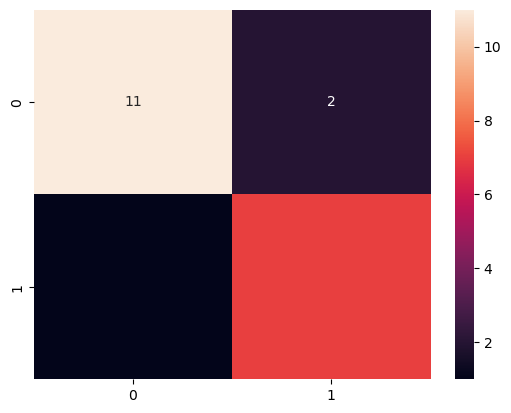

In [217]:
sns.heatmap(cm,annot=True)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [220]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.78      0.88      0.82         8

    accuracy                           0.86        21
   macro avg       0.85      0.86      0.85        21
weighted avg       0.86      0.86      0.86        21



**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [113]:
#CODE HERE

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

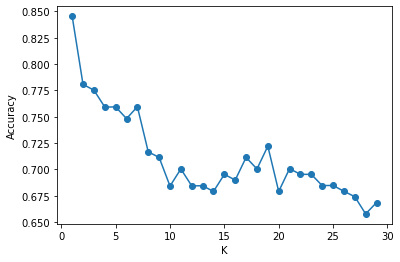

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [117]:
#Code Here

array([[12,  1],
       [ 1,  7]], dtype=int64)

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



### Great Job!